In [1]:
from collections import defaultdict
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import os
import time
import re
from random import randint
%matplotlib inline

In [3]:
def readgraph(file):
    """
    input file_name (str)
    output converted to graph(defaultdict)
    """
    g=defaultdict(list)
    f=open(file,"r")
    for line in f:
        d=re.findall(r'\d+',line)
        i=1
        while i<len(d):
            g[int(d[0])].append((int(d[i]),int(d[i+1])))
            i+=2
    f.close()
    return g

def writegraph(g,file_name):
    """
    input given graph g and file_name
    output file having graph in adjcency list
    """
    f=open(file_name,"w")
    for node,tup in g.items():
        f.write(str(node)+"(")
        for x,y in tup[:len(tup)-1]:
            f.write("("+str(x)+","+str(y)+"),")
        f.write("("+str(tup[len(tup)-1][0])+","+str(tup[len(tup)-1][1])+")")
        f.write(")"+"\n")
    f.close()
    

def makegraph(num_node,num_edge):
    g=defaultdict(list)
    #making a connected graph
    
    #adding initial node
    g[0]=[]
    node=1
    #adding remaning nodes
    while node<num_node:
        x=randint(0,node-1)
        weight=randint(1,50)
        g[node].append((x,weight))
        g[x].append((node,weight))
        node+=1
        
    #adding ranndom edges
    e=len(get_alledges(g))
    while e<num_edge:
        x=randint(0,node)
        y=randint(0,node)
        while x==y:
            y=randint(0,node)
        weight=randint(1,50)
        g[x].append((y,weight))
        g[y].append((x,weight))
        e+=1
    return(g)

def generate_graphs(num_graph):
    """
    input # of graphs
    output graphs in text format"""
    path="input_graphs/"
    if not os.path.exists(path):
        os.makedirs(path)
    
    size_list=[i for i in range(10,num_graph+10)]
    t=[i for i in range(-1,num_graph-1)]
    edge_list=[size_list[i]+t[i] for i in range(0,num_graph)]
    file_counter=0
    for x,y in zip(size_list,edge_list):
        g=makegraph(x,y)
        writegraph(g,path+"graph"+str(file_counter)+".txt")
        file_counter+=1

In [4]:
"""adjcency list for graph implemented using defaultdict in python"""
def creategraph():
    """
    input :none
    output:an undirected graph g
    graph from link https://en.wikipedia.org/wiki/Minimum_spanning_tree"""
    g = defaultdict(list)
    g[0].extend([(1,1),(3,4),(4,3)])
    g[1].extend([(0,1),(3,4),(4,2)])
    g[2].extend([(4,4),(5,5)])
    g[3].extend([(0,4),(1,4),(4,4)])
    g[4].extend([(0,3),(1,2),(2,4),(3,4),(5,7)])
    g[5].extend([(2,5),(4,7)])
    
    return g
print(creategraph())

defaultdict(<class 'list'>, {0: [(1, 1), (3, 4), (4, 3)], 1: [(0, 1), (3, 4), (4, 2)], 2: [(4, 4), (5, 5)], 3: [(0, 4), (1, 4), (4, 4)], 4: [(0, 3), (1, 2), (2, 4), (3, 4), (5, 7)], 5: [(2, 5), (4, 7)]})


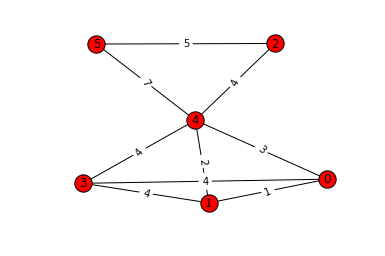

In [5]:
def get_alledges(g):
    """
    input:  any graph g(defaultdict)
    output: returns list of edges with weights in
            (vertex,node),weight tuples
    """
    alledges=[]
    for vertex,l in g.items():
        for node,weight in l:
            if ((node,vertex),weight) not in alledges:
                alledges.append(((vertex,node),weight))
    return alledges

def get_allnodes(g):
    """
    input: any graph g
    output: list representing all nodes in graph"""
    return list(g.keys())

def get_neighbors(node,g,with_weights=False):
    """
    input:node for which neighbors are requried, g any graph,a boolean True to return weights
    ouput:returns list of neighbors or neighbors,weight tuples"""
    if with_weights==False:
        return [node for node,weight in g[node]]
    else :
        return g[node]

def drawgraph(g):
    #creating node_list and edge_list
    #make node and edge lables
    node_list=get_allnodes(g)
    edge_list=[edge for edge,weight in get_alledges(g)]
    edge_weight=dict(get_alledges(g))
    G =nx.Graph()
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)
    pos=nx.spring_layout(G)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_weight)
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)
    plt.axis('off')
drawgraph(creategraph())
plt.savefig("sample_graph_1.png")

In [6]:
"""imlementing disjoint set using dict storing elements
node:[parent,rank] 
parent-->dict[node][0]
rank-->dict[node][1]"""

def makeset(node_list):
    return dict((node,[node,0]) for node in node_list)

def union(x,y,d):
    link(findset(x,d),findset(y,d),d)

def link(x,y,d):
    if d[x][1]>d[y][1]:
        d[y][0]=x
    else:
        d[x][0]=y
        if d[x][1]==d[y][1]:
            d[y][1]+=1
            
def findset(x,d):
    if x!=d[x][0]:
        d[x][0]=findset(d[x][0],d)
    return d[x][0]

[((0, 1), 1), ((0, 3), 4), ((1, 4), 2), ((2, 4), 4), ((2, 5), 5)] weight= 16


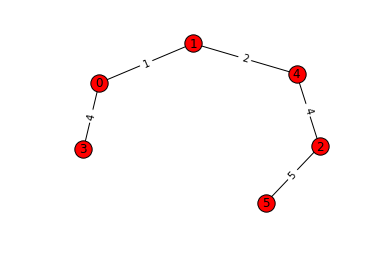

In [7]:
#kruskhals algorithm
def kruskhals(g):
    """
    input: any graph g
    output: a list of edge,weight tuples
            weight of mst
            a mst of g"""
    mst=defaultdict(list)
    mst.update(dict((node,[]) for node in get_allnodes(g)))
    
    #make_set
    d=makeset(list(g.keys()))
    
    #sorting edges in ascending order of weights
    alledges=sorted(get_alledges(g),key= lambda tup:tup[1])
    
    #adding edges to graph
    for edge,weight in alledges:
        if findset(edge[0],d)!=findset(edge[1],d):
            #no cycle formed add edge to mst
            mst[edge[0]].append((edge[1],weight))
            mst[edge[1]].append((edge[0],weight))
            union(edge[0],edge[1],d)
    return mst

q=kruskhals(creategraph())
drawgraph(q)
print(get_alledges(q),"weight=",sum([weight for (tup,weight) in get_alledges(q)]))
plt.savefig("kruskhals_mst_1.png")

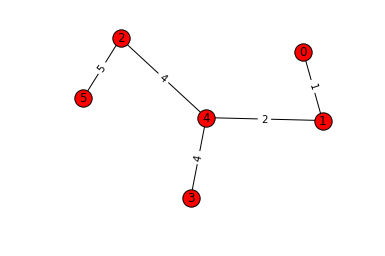

In [8]:
def to_graph(p,e):
    """
    input parent dict mapping node->parent
    output fig of mst"""
    mst=defaultdict(list)
    for child,parent in p.items():
        if parent!=None:
            mst[child].append((parent,e[child]))
    return mst
    
def replace(i,weight,v,l):
    """
    input index,weight of vertex,vertex,heap
    output same heap with element at index i replace with weight,v"""
    if i==(len(l)-1):
        l.pop()
    else:
        l[i]=l[-1]
        l.pop()
        heapq._siftup(l,i)
        heapq._siftdown(l,0,i)
    heapq.heappush(l,(weight,v))
    return l

def prims(g,root):
    """
    input any graph g,root node to beign prims with
    output a parent dict mapping node->parent
        weight of mst
        a mst of g"""
    #creating parent and key dict
    label_list=[]
    parent={}
    for node in get_allnodes(g):
        label_list.append((9999,node))
        parent[node]=None
        
    #selecting root
    for tup in label_list:
        if tup[1]==root:
            label_list[label_list.index(tup)]=(0,root)
    #creating heap        
    heapq.heapify(label_list)
    
    edge_label={}
    
    while len(label_list)!=0:
        #extracting edge with min_label
        min_label,u=heapq.heappop(label_list)
        
        edge_label[u]=min_label
        
        for v,weight in get_neighbors(u,g,True):
            for tup in label_list:
                if tup[1]==v and weight<tup[0]:
                    parent[v]=u
                    label_list=replace(label_list.index(tup),weight,v,label_list)
    #print(parent,"weight=",sum(edge_label.values()))
    return to_graph(parent,edge_label)

drawgraph(prims(creategraph(),2))
plt.savefig("prims_mst_1.png")

0 1 -> 1
1 4 -> 2
4 3 -> 4
3 2 -> 4
2 5 -> 5
[((0, 1), 1), ((1, 4), 2), ((2, 3), 4), ((2, 5), 5), ((3, 4), 4)] weight= 16


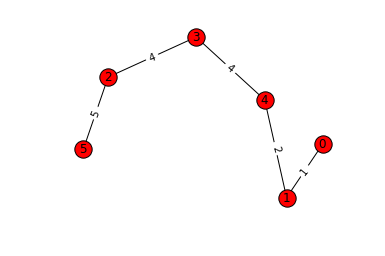

In [24]:
g=creategraph()

#prims algorithm-- alternative implementation no heap used more time
def prims(g): 
    """
    input: any graph g
    output: a mst of g"""
    #think of s
    mst=defaultdict(list)
    #adding first vertex in s
    root=get_allnodes(g)[0]
    mst[root]=[]
    cutset=set()
    
    while len(get_allnodes(mst))<len(get_allnodes(g)):
        #finding smallest edge in cutset
        cutset.update(set([x for x in get_neighbors(root,g,True) if x[0] not in get_allnodes(mst)]))
        neighbor_list=sorted(list(cutset),key=lambda x:x[1])
        min_edge,min_weight=neighbor_list[0]
        print(root,min_edge,"->",min_weight)
        
        #add edge to s 
        mst[root].append((min_edge,min_weight))
        mst[min_edge].append((root,min_weight))
        
        #update cutset
        for edge,weight in list(cutset):
            if edge==min_edge:
                cutset.remove((min_edge,weight))
        root=min_edge
    return mst

q=prims(g)
drawgraph(q)
print(get_alledges(q),"weight=",sum([weight for (tup,weight) in get_alledges(q)]))

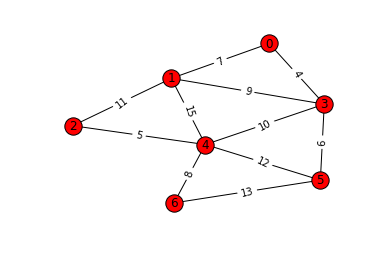

In [10]:
def examplegraph2():
    """
    input :none
    output:an undirected graph g
    graph from link https://en.wikipedia.org/wiki/Bor%C5%AFvka's_algorithm"""
    g = defaultdict(list)
    g[0].extend([(1,7),(3,4)])
    g[1].extend([(0,7),(2,11),(3,9),(4,15)])
    g[2].extend([(1,11),(4,5)])
    g[3].extend([(0,4),(1,9),(4,10),(5,6)])
    g[4].extend([(1,15),(2,5),(3,10),(5,12),(6,8)])
    g[5].extend([(3,6),(4,12),(6,13)])
    g[6].extend([(4,8),(5,13)])
    return g
drawgraph(examplegraph2())

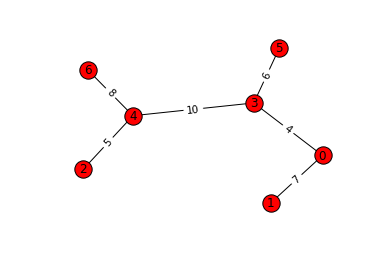

In [11]:
g =examplegraph2()# readgraph("input_graphs/graph10.txt")
mst=defaultdict(list)
mst.update(dict((u,[]) for u in get_allnodes(g)))

#make_set
d=makeset(list(g.keys()))

def getset(d):
    s=defaultdict(list)
    for x,p in d.items():
        s[findset(p[0],d)].append(x)
    return s

def find_weight(node,l):
    """
    input node to find in list of tuple (node,weight)
    output weight"""
    for n,weight in l:
        if node==n:
            return weight
        
def remove_multi_edges(l):   
    d=defaultdict(list)
    for u,w in l:
        d[u].append(w)
    for u in d.keys():
        d[u]=sorted(d[u])[0]
    return list(d.items())

#borvaka/shilon algo
def borvaka(g):
    """
    input: any graph g
    output: an mst of g"""
    #print("mst-->",mst,"g-->",g)
    min_edge={}
    #adding smallest edge incident to every v
    for u in get_allnodes(g):
        min_edge[u]=sorted(get_neighbors(u,g,True),key=lambda x:x[1])[0]
    
    #adding each such edge to mst,if not loop
    for u,(v,weight) in min_edge.items():
        if findset(u,d)!=findset(v,d):
            #no cycle formed add edge to mst
            mst[u].append((v,weight))
            mst[v].append((u,weight))
            union(u,v,d)
    
    #contract edges in g
    g_new=defaultdict(list)
    for u,component_list in getset(d).items():
        for v in component_list:
            for x in set(get_neighbors(v,g))-set(component_list):
                g_new[u].append((findset(x,d),find_weight(x,get_neighbors(v,g,True))))
                
    #remove multi-edges
    for node,adj_list in g_new.items():
        g_new[node]=remove_multi_edges(adj_list)
    
    if len(g_new)>1:
        borvaka(g_new)
    else:
        return
    
borvaka(g)
drawgraph(mst)
plt.savefig("borvaka_mst_1.png")

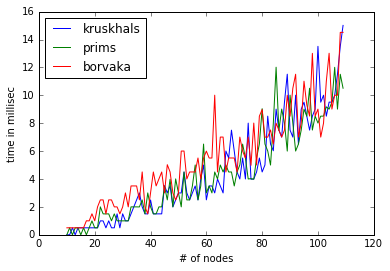

In [12]:
def main():
    #generating graphs if not done earlier
    num_graphs=100
    path="input_graphs/"
    if not os.path.exists(path):
        generate_graphs(num_graphs)
    
    #running alog
    #list to store performance time in milliseconds 
    k_time=[]
    p_time=[]
    b_time=[]
    
    file_counter=0
    while os.path.exists(path+"graph"+str(file_counter)+".txt"):
        global g
        g=readgraph(path+"graph"+str(file_counter)+".txt")
        
        start_time=time.time()
        kruskhals(g)
        k_time.append((time.time()-start_time)*1000)
        
        start_time=time.time()
        prims(g,0)
        p_time.append((time.time()-start_time)*1000)
        
        #g =readgraph("input_graphs/graph0.txt")
        global mst
        mst=defaultdict(list)
        mst.update(dict((u,[]) for u in get_allnodes(g)))

        #make_set
        global d
        d=makeset(list(g.keys()))
        
        start_time=time.time()
        borvaka(g)
        b_time.append((time.time()-start_time)*1000)
        
        file_counter+=1
    #print(k_time,"\n",p_time,"\n",b_time)
    x=[i for i in range(10,num_graphs+10)]
    plt.plot(x,k_time)
    plt.plot(x,p_time)
    plt.plot(x,b_time)
    plt.xlabel('# of nodes')
    plt.ylabel('time in millisec')
    plt.legend(['kruskhals','prims','borvaka'], loc='upper left')
    #plt.show()
    plt.savefig('performance_graph.png')
if __name__ == "__main__":
    main()